In [1]:
# Reading the file 'pipeline.pkl':
import pickle
with open('pipeline.pkl', 'rb') as file:
    pipeline = pickle.load(file)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("../data/creditcard.csv")

y = df['Class'].copy()
X = df.drop(columns=['Class', 'Time']).copy()

# Split the data into training and testing sets
X_tr, X_ts, y_tr, y_ts = train_test_split(
    X, y, test_size=0.3,
    random_state=42, stratify=y)

In [7]:
import shap

preprocessor = pipeline[:-1]
X_pp = preprocessor.transform(X_tr)
X_pp

array([[-6.22483464e-03,  4.51232510e-01,  1.16432031e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 9.50215680e-01, -1.16006327e-01, -1.52429952e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-5.79199211e-01, -2.82247864e+00, -9.66700096e-01, ...,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       ...,
       [-8.00915509e-01,  4.19809894e-01,  1.09932947e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-6.66863586e-19, -1.10317389e-18,  3.47358298e-01, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-3.19654261e-01,  4.94290655e-01,  1.26692571e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00]])

In [ ]:
explainer = shap.TreeExplainer(pipeline[-1].best_estimator_)
shap_values = explainer.shap_values(X_pp)

In [38]:
import matplotlib.pyplot as plt
shap_values[1].shape

(199364, 54)

## Explicação global

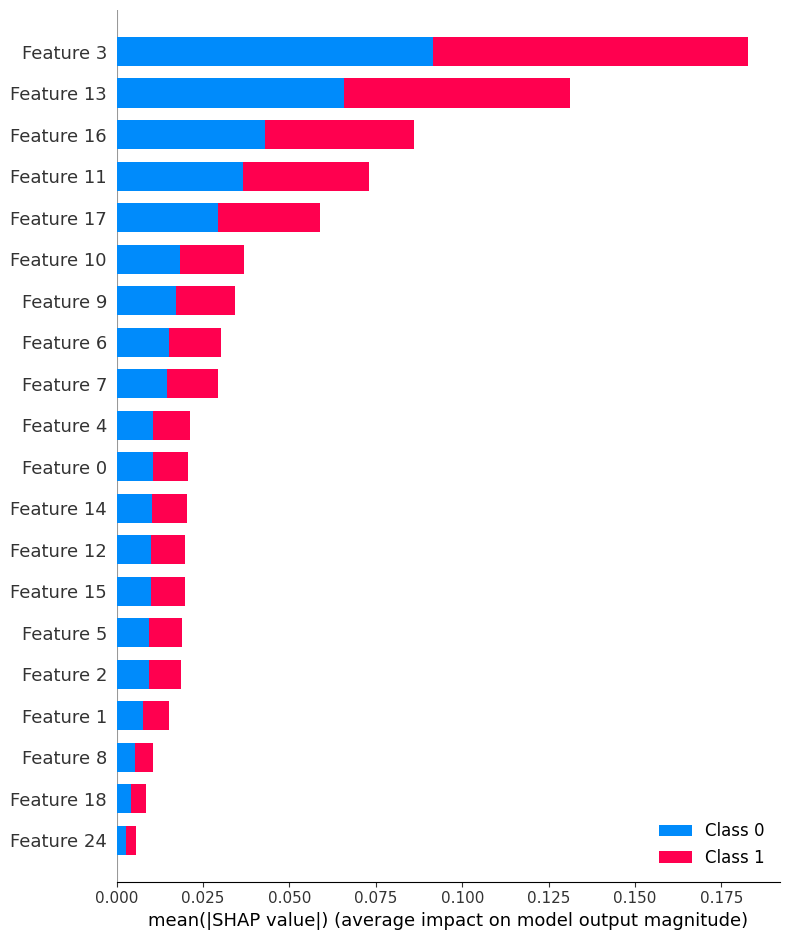

In [4]:
shap.summary_plot(shap_values, X_pp)

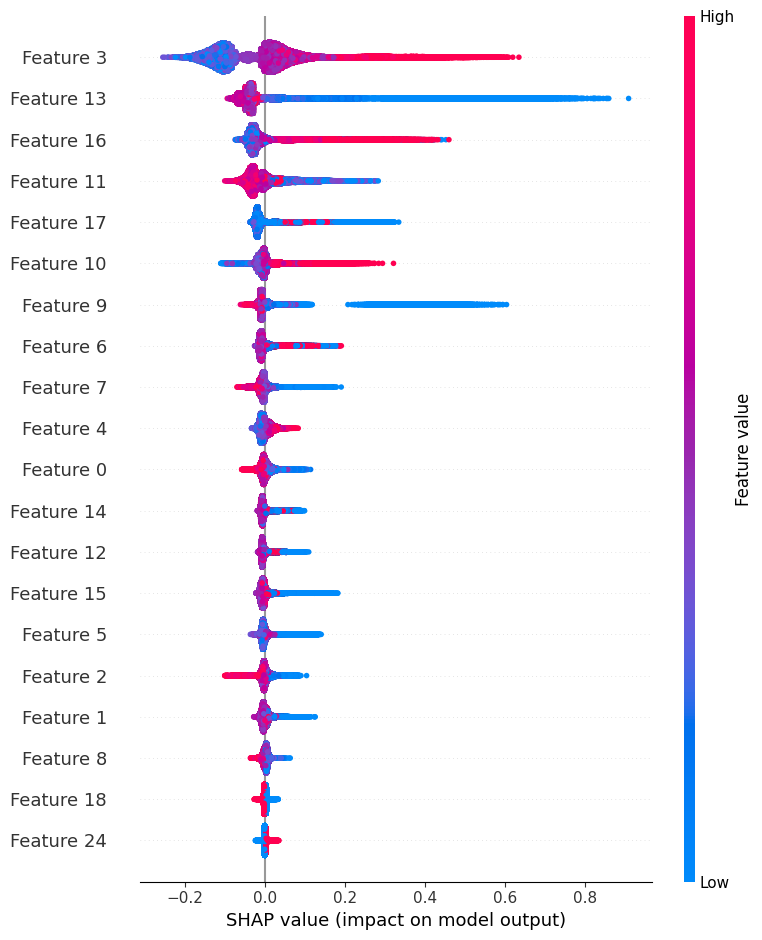

In [5]:
shap.summary_plot(shap_values[1], X_pp)

In [6]:
import shap
shap.initjs()

In [34]:
shap.force_plot(explainer.expected_value[1], shap_values[1][:1000,:], X_pp[:1000,:])

## Explicação local (decisão individual)

In [18]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_pp[0,:])

In [26]:
from shap import Explanation

explanation = Explanation(shap_values[1], base_values=explainer.expected_value[1])

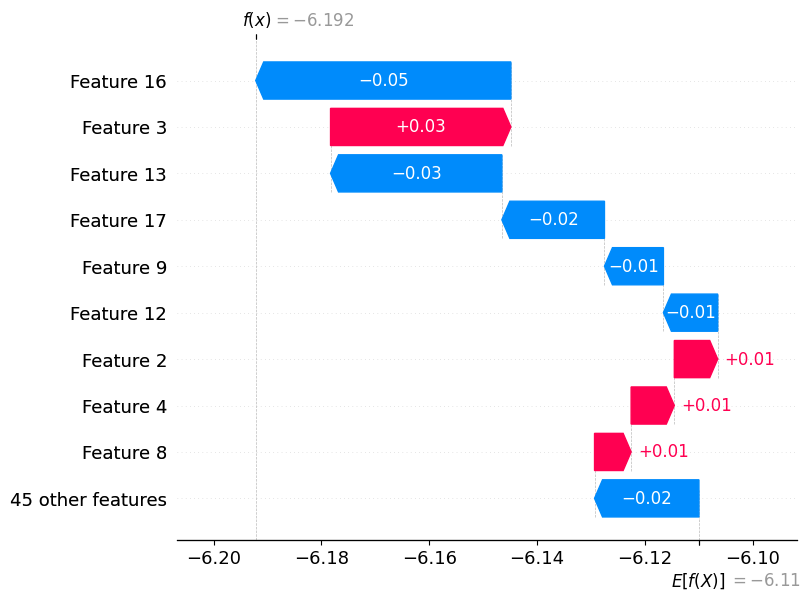

In [27]:
shap.plots.waterfall(explanation[0])